<a href="https://colab.research.google.com/github/ravillanuevar/test/blob/master/GBM_XGBosst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [361]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [362]:
print(df.describe())
df.describe(include='all')

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [363]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [364]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [365]:
df.drop('customerID',axis=1,inplace=True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [366]:
df['TotalCharges'].describe()

,TotalCharges
count,7043
unique,6531
top,
freq,11


In [367]:
#numero de nulos TotalCharges
len(df[df['TotalCharges']==" "])

11

In [368]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [369]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())
len(df[df['TotalCharges']==" "])

0

Churn
No     5174
Yes    1869
Name: count, dtype: int64


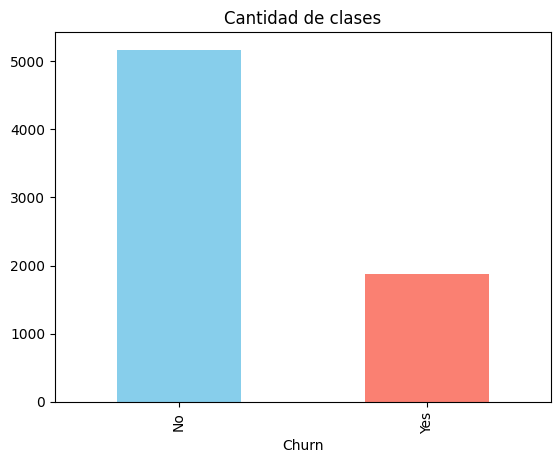

In [370]:
conteoclases = df['Churn'].value_counts()
print(conteoclases)

conteoclases.plot(kind='bar', title='Cantidad de clases', color=['skyblue', 'salmon'])
plt.show()

In [371]:
df['Churn']=df['Churn'].apply(lambda x:1 if x=='Yes' else 0)
df['Churn'].value_counts()# imbalance

,count
Churn,
0,5174
1,1869


In [372]:
clase1 = 5174 #clase 0 - No churn
clase2 = 1869 #clase 1 - churn

clase1 = (clase1*100)/7043
clase2 = (clase2*100)/7043
print(clase1)
print(clase2)

73.46301292063042
26.536987079369588


In [373]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [374]:
categorical=list(df.select_dtypes(include=['object']).columns)
numerical=list(df.select_dtypes(include=['number']).columns)

In [375]:
categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [376]:
numerical

['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [377]:
numerical.remove('Churn')

In [378]:
# calculate the feature importance
global_mean=df['Churn'].mean()
round(global_mean,2)

np.float64(0.27)

In [379]:
#gender
churn_gender=df.groupby('gender').Churn.mean()
gender_risk= churn_gender/global_mean
gender_risk

,Churn
gender,
Female,1.014466
Male,0.985807


In [380]:
#partner
churn_partner=df.groupby('Partner').Churn.mean()
partner_risk= churn_partner/global_mean
partner_risk

,Churn
Partner,
No,1.241964
Yes,0.741038


In [381]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [382]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [383]:
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

df[numerical].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470


<Axes: >

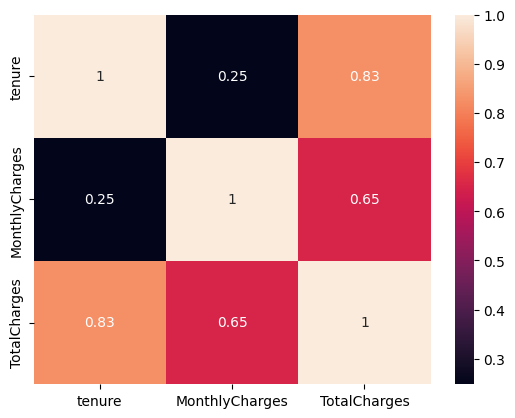

In [384]:
#Matriz de correlación
corr_num=df[numerical].corr()
sns.heatmap(corr_num,annot=True)

Existe una correlación positiva muy alta (0.83) entre tenure(antigüedad) y TotalCharges. Cuanto más tiempo permanece un cliente con la empresa (mayor antigüedad), mayor es el acumulado de dinero que ha pagado en total. Es la relación más fuerte del gráfico.

Hay una correlación positiva significativa (0.65) entre MonthlyCharges y TotalCharges. Los clientes que pagan más mensualmente tienden a tener cargos totales más altos. Sin embargo, esta relación es menos intensa que la de la antigüedad, lo que sugiere que el tiempo de permanencia influye más en el "gasto total" que el precio del plan mensual por sí solo.

La correlación entre tenure y MonthlyCharges es baja (0.25).La antigüedad del cliente no determina cuánto paga al mes. Esto indica que tanto los clientes nuevos como los antiguos están distribuidos de forma similar entre los planes baratos y caros. No parece haber una tendencia de que los clientes antiguos migren a planes más caros o que los nuevos entren solo con ofertas de precios altos.

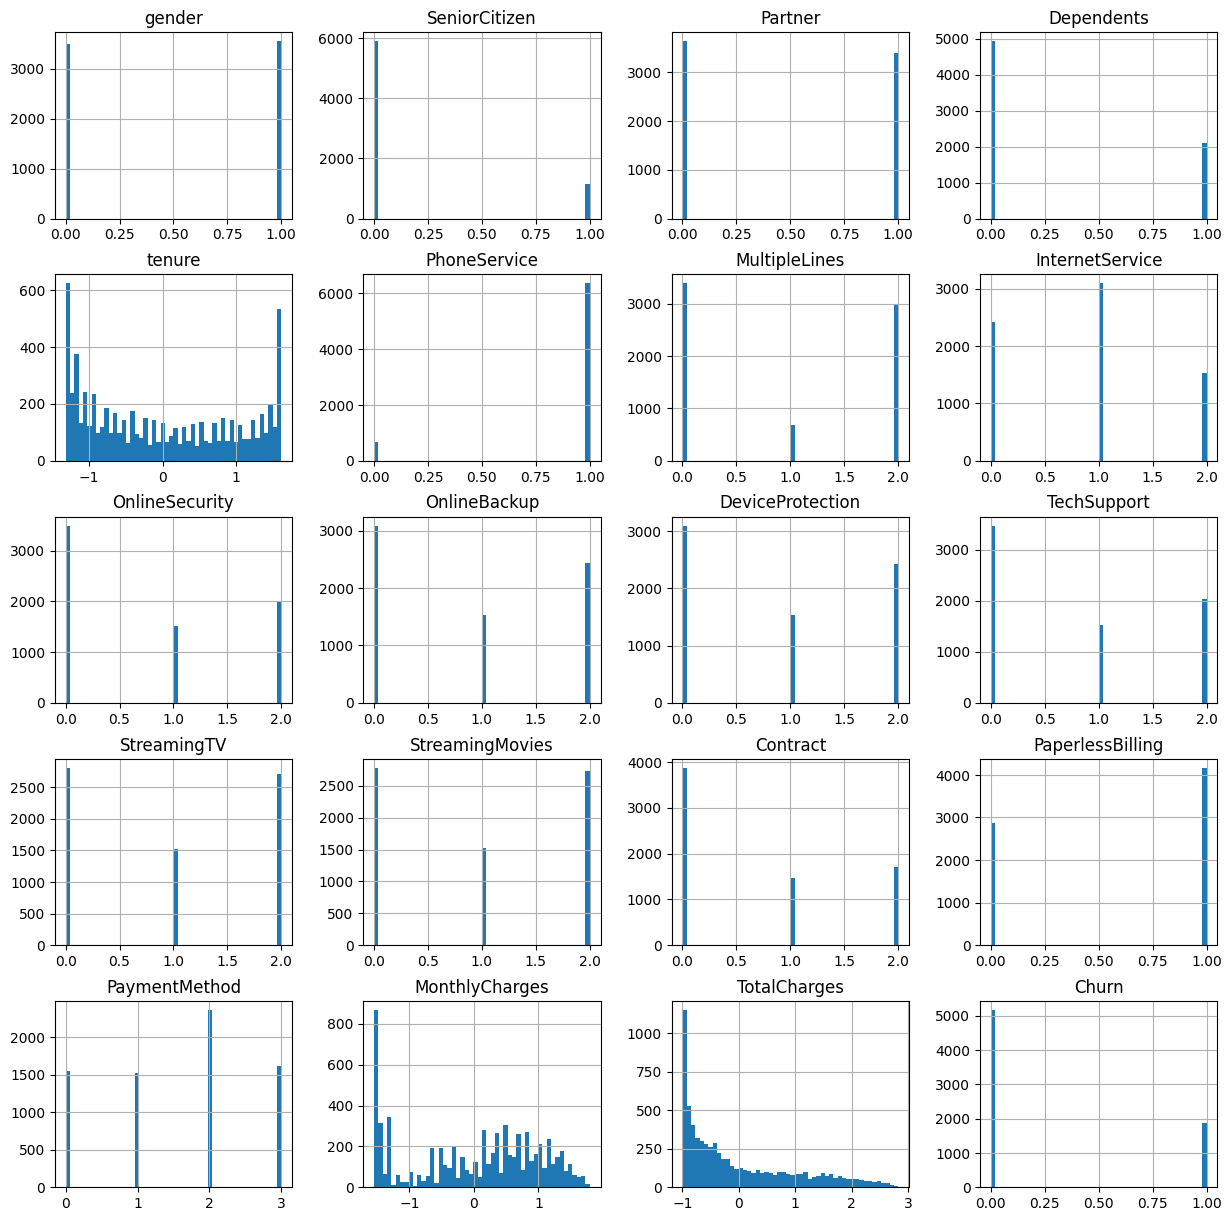

In [385]:
df.hist(bins=50,figsize=(15,15))
plt.show()

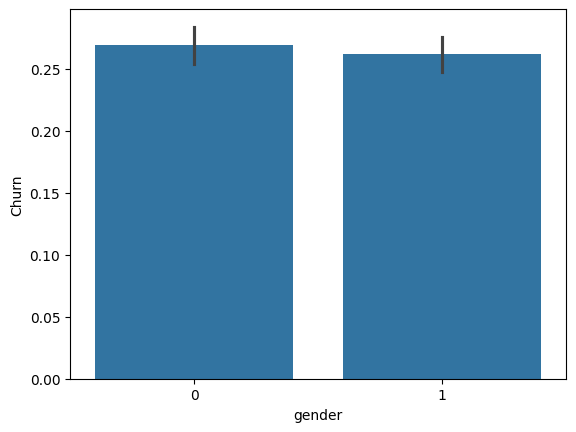

In [386]:
sns.barplot(data=df,x=df['gender'],y=df['Churn'])
plt.show()

<Axes: title={'center': 'Correlation with Churn '}>

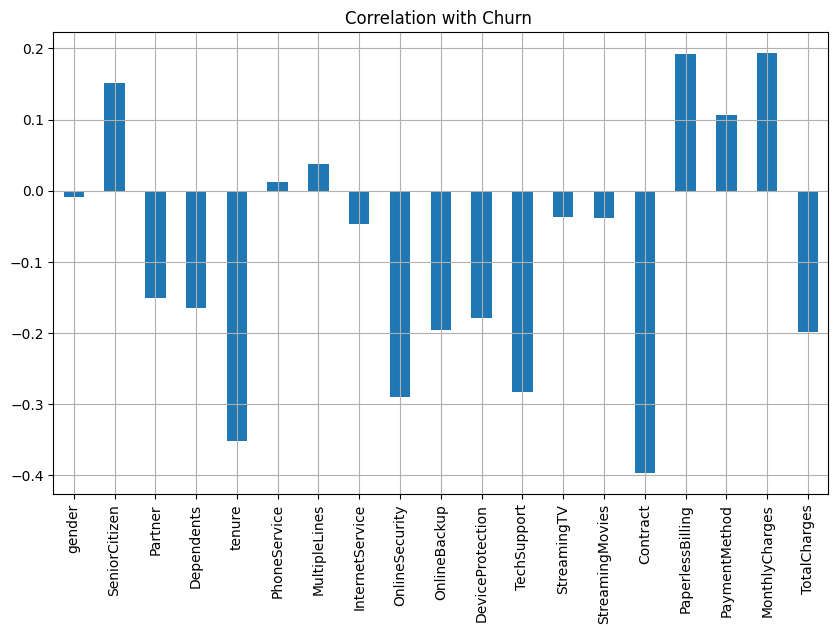

In [387]:
df.drop('Churn',axis=1).corrwith(df.Churn).plot(kind='bar',grid=True,figsize=(10,6),title="Correlation with Churn ")

In [388]:
x=df.drop(columns=['Churn'],axis=1)
y=df['Churn']

In [389]:
y.value_counts()

,count
Churn,
0,5174
1,1869


In [390]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(f"the shape of x_train is : {x_train.shape}")
print(f'the shape of x_test is : {x_test.shape}')
print(f'the shape of y_tain is : {y_train.shape}')
print(f'the shape of y_test is {y_test.shape}')



the shape of x_train is : (5282, 19)
the shape of x_test is : (1761, 19)
the shape of y_tain is : (5282,)
the shape of y_test is (1761,)


In [401]:
#Modelos
!pip install catboost
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,mean_squared_error as MSE
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import time

**Modelos Boosting**
GBM-XGBoost-LightBoost-CatBoost

Métricas

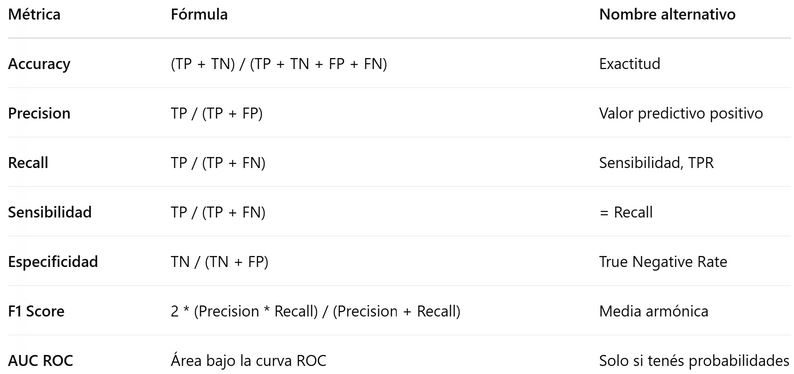

MSE: 0.4464510824210075

Accuracy: 0.80

 Clase 0:
  TP: 1168, FP: 237, FN: 114, TN: 242
  Precisión:     0.83
  Recall:        0.91
  Especificidad: 0.51
  F1-score:      0.87
  Accuracy:      0.80

 Clase 1:
  TP: 242, FP: 114, FN: 237, TN: 1168
  Precisión:     0.68
  Recall:        0.51
  Especificidad: 0.91
  F1-score:      0.58
  Accuracy:      0.80
###################################################################


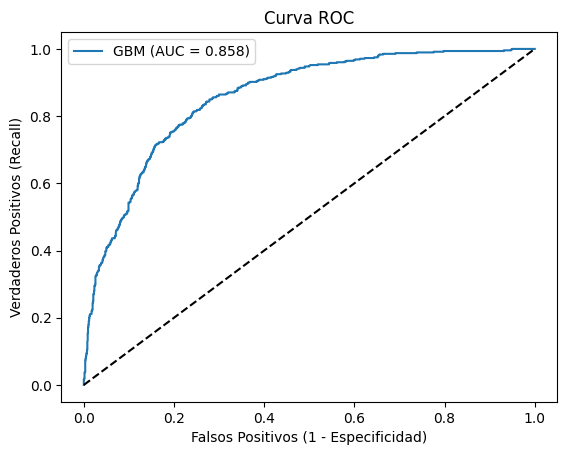


Run Time: 1.6489696502685547 seconds.


In [406]:
#GradientBoostingClassifier
start = time.time()
gbr = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=4, random_state=42)
model = gbr.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('MSE:',MSE(y_test, y_pred)**0.5)
#print(classification_report(y_test, y_pred))
cm_gbr = confusion_matrix(y_test, y_pred)

num_classes = cm_gbr.shape[0]
total_samples = cm_gbr.sum()
correct_predictions = np.trace(cm_gbr)
accuracy = correct_predictions / total_samples
print(f"\nAccuracy: {accuracy:.2f}")
for i in range(num_classes):
    tp = cm_gbr[i, i]  # Verdaderos positivos
    fp = cm_gbr[:, i].sum() - tp  # Falsos positivos
    fn = cm_gbr[i, :].sum() - tp  # Falsos negativos
    tn = cm_gbr.sum() - (tp + fp + fn)  # Verdaderos negativos

    # Precisión, recall, especificidad, F1-score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy_gbr = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0

    # Imprimir resultados por clase
    print(f"\n Clase {i}:")
    print(f"  TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")
    print(f"  Precisión:     {precision:.2f}")
    print(f"  Recall:        {recall:.2f}")
    print(f"  Especificidad: {specificity:.2f}")
    print(f"  F1-score:      {f1:.2f}")
    print(f"  Accuracy:      {accuracy_gbr:.2f}")
print("###################################################################")
#Curva ROC-AUC
# 1. Obtener las probabilidades de la clase positiva (Churn)
# El [:, 1] selecciona la segunda columna, que es la probabilidad de ser "1"
probs_gbm = model.predict_proba(x_test)[:, 1]
#======================================
end = time.time()
elapsed = end - start
#======================================
# 2. Calcular la curva
fpr, tpr, thresholds = roc_curve(y_test, probs_gbm)
# 3. Graficar
plt.plot(fpr, tpr, label=f'GBM (AUC = {roc_auc_score(y_test, probs_gbm):.3f})')
plt.plot([0, 1], [0, 1], 'k--') # Línea diagonal de referencia
plt.xlabel('Falsos Positivos (1 - Especificidad)')
plt.ylabel('Verdaderos Positivos (Recall)')
plt.title('Curva ROC')
plt.legend()
plt.show()

print('\nRun Time: ' + str(elapsed) + ' seconds.')


Accuracy: 0.80

 Clase 0:
  TP: 1157, FP: 233, FN: 125, TN: 246
  Precisión:     0.83
  Recall:        0.90
  Especificidad: 0.51
  F1-score:      0.87

 Clase 1:
  TP: 246, FP: 125, FN: 233, TN: 1157
  Precisión:     0.66
  Recall:        0.51
  Especificidad: 0.90
  F1-score:      0.58
###################################################################


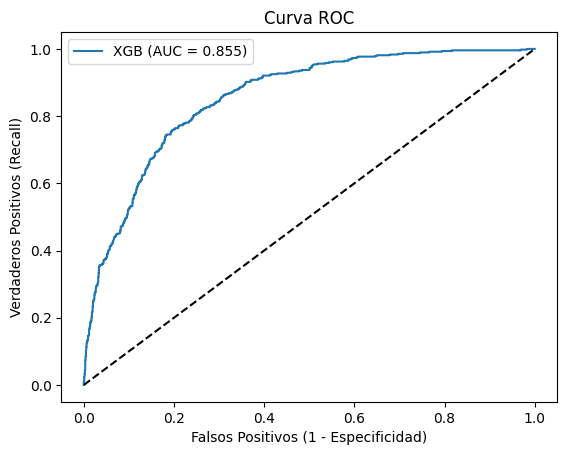


Run Time: 0.4725019931793213 seconds.


In [407]:
#XGBClassifier
start = time.time()
xgb = XGBClassifier(n_estimators=100, max_depth=2, random_state=2)
model = xgb.fit(x_train, y_train)
y_pred = model.predict(x_test)
#print(classification_report(y_test, y_pred))
cm_xgb = confusion_matrix(y_test, y_pred)

num_classes = cm_xgb.shape[0]
total_samples = cm_xgb.sum()
correct_predictions = np.trace(cm_xgb)
accuracy = correct_predictions / total_samples
print(f"\nAccuracy: {accuracy:.2f}")
for i in range(num_classes):
    tp = cm_xgb[i, i]  # Verdaderos positivos
    fp = cm_xgb[:, i].sum() - tp  # Falsos positivos
    fn = cm_xgb[i, :].sum() - tp  # Falsos negativos
    tn = cm_xgb.sum() - (tp + fp + fn)  # Verdaderos negativos

    # Precisión, recall, especificidad, F1-score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Imprimir resultados por clase
    print(f"\n Clase {i}:")
    print(f"  TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")
    print(f"  Precisión:     {precision:.2f}")
    print(f"  Recall:        {recall:.2f}")
    print(f"  Especificidad: {specificity:.2f}")
    print(f"  F1-score:      {f1:.2f}")

print("###################################################################")
#Curva ROC-AUC
# 1. Obtener las probabilidades de la clase positiva (Churn)
# El [:, 1] selecciona la segunda columna, que es la probabilidad de ser "1"
probs_xgb = model.predict_proba(x_test)[:, 1]
#======================================
end = time.time()
elapsed = end - start
#======================================
# 2. Calcular la curva
fpr, tpr, thresholds = roc_curve(y_test, probs_xgb)
# 3. Graficar
plt.plot(fpr, tpr, label=f'XGB (AUC = {roc_auc_score(y_test, probs_xgb):.3f})')
plt.plot([0, 1], [0, 1], 'k--') # Línea diagonal de referencia
plt.xlabel('Falsos Positivos (1 - Especificidad)')
plt.ylabel('Verdaderos Positivos (Recall)')
plt.title('Curva ROC')
plt.legend()
plt.show()
print('\nRun Time: ' + str(elapsed) + ' seconds.')


Accuracy: 0.80

 Clase 0:
  TP: 1157, FP: 233, FN: 125, TN: 246
  Precisión:     0.83
  Recall:        0.90
  Especificidad: 0.51
  F1-score:      0.87

 Clase 1:
  TP: 246, FP: 125, FN: 233, TN: 1157
  Precisión:     0.66
  Recall:        0.51
  Especificidad: 0.90
  F1-score:      0.58
###################################################################


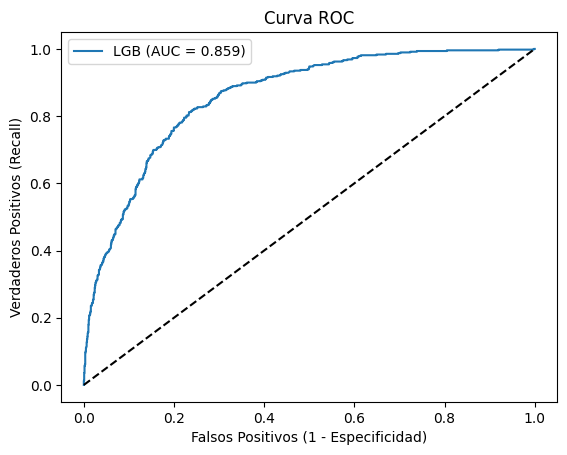


Run Time: 0.2564873695373535 seconds.


In [408]:
#LGBMClassifier
start = time.time()
lgb=LGBMClassifier(n_estimators=150, learning_rate=0.05, max_depth=4,class_weight='balanced', random_state=42, verbose=-1)
model=lgb.fit(x_train,y_train)
#print(classification_report(y_test, y_pred))
cm_lgb = confusion_matrix(y_test, y_pred)
#print(f"LGBM Accuracy: {accuracy_LGBM:.2f}")
num_classes = cm_lgb.shape[0]
total_samples = cm_lgb.sum()
correct_predictions = np.trace(cm_lgb)
accuracy = correct_predictions / total_samples
print(f"\nAccuracy: {accuracy:.2f}")
for i in range(num_classes):
    tp = cm_lgb[i, i]  # Verdaderos positivos
    fp = cm_lgb[:, i].sum() - tp  # Falsos positivos
    fn = cm_lgb[i, :].sum() - tp  # Falsos negativos
    tn = cm_lgb.sum() - (tp + fp + fn)  # Verdaderos negativos

    # Precisión, recall, especificidad, F1-score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Imprimir resultados por clase
    print(f"\n Clase {i}:")
    print(f"  TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")
    print(f"  Precisión:     {precision:.2f}")
    print(f"  Recall:        {recall:.2f}")
    print(f"  Especificidad: {specificity:.2f}")
    print(f"  F1-score:      {f1:.2f}")

print("###################################################################")
#Curva ROC-AUC
# 1. Obtener las probabilidades de la clase positiva (Churn)
# El [:, 1] selecciona la segunda columna, que es la probabilidad de ser "1"
probs_lgb = model.predict_proba(x_test)[:, 1]
#======================================
end = time.time()
elapsed = end - start
#======================================
# 2. Calcular la curva
fpr, tpr, thresholds = roc_curve(y_test, probs_lgb)
# 3. Graficar
plt.plot(fpr, tpr, label=f'LGB (AUC = {roc_auc_score(y_test, probs_lgb):.3f})')
plt.plot([0, 1], [0, 1], 'k--') # Línea diagonal de referencia
plt.xlabel('Falsos Positivos (1 - Especificidad)')
plt.ylabel('Verdaderos Positivos (Recall)')
plt.title('Curva ROC')
plt.legend()
plt.show()
print('\nRun Time: ' + str(elapsed) + ' seconds.')


Accuracy: 0.75

 Clase 0:
  TP: 927, FP: 80, FN: 355, TN: 399
  Precisión:     0.92
  Recall:        0.72
  Especificidad: 0.83
  F1-score:      0.81

 Clase 1:
  TP: 399, FP: 355, FN: 80, TN: 927
  Precisión:     0.53
  Recall:        0.83
  Especificidad: 0.72
  F1-score:      0.65
###################################################################


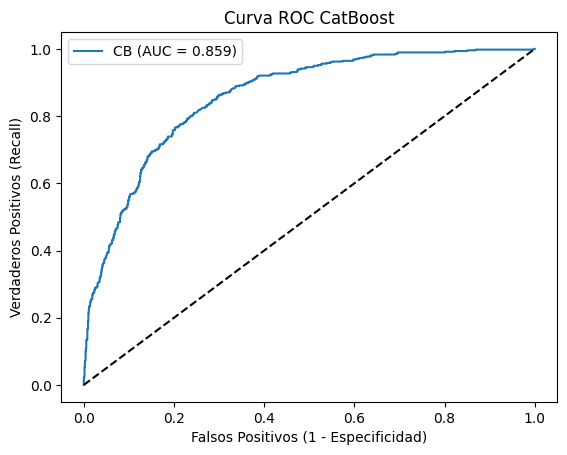


Run Time: 0.36524343490600586 seconds.


In [409]:
#CatBoostClassifier
start = time.time()
cb=CatBoostClassifier(n_estimators=150, learning_rate=0.05, max_depth=4,class_weights=[1, len(y_train[y_train==0])/len(y_train[y_train==1])], random_state=42, verbose=0, cat_features=None)
model=cb.fit(x_train,y_train)
y_pred=model.predict(x_test)
#print(classification_report(y_test, y_pred))
cm_cb = confusion_matrix(y_test, y_pred)
num_classes = cm_cb.shape[0]
total_samples_cb = cm_cb.sum()
correct_predictions_cb = np.trace(cm_cb)
accuracy_cb = correct_predictions_cb / total_samples_cb
print(f"\nAccuracy: {accuracy_cb:.2f}")
for i in range(num_classes):
    tp = cm_cb[i, i]  # Verdaderos positivos
    fp = cm_cb[:, i].sum() - tp  # Falsos positivos
    fn = cm_cb[i, :].sum() - tp  # Falsos negativos
    tn = cm_cb.sum() - (tp + fp + fn)  # Verdaderos negativos

    # Precisión, recall, especificidad, F1-score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Imprimir resultados por clase
    print(f"\n Clase {i}:")
    print(f"  TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")
    print(f"  Precisión:     {precision:.2f}")
    print(f"  Recall:        {recall:.2f}")
    print(f"  Especificidad: {specificity:.2f}")
    print(f"  F1-score:      {f1:.2f}")

print("###################################################################")
#Curva ROC-AUC
# 1. Obtener las probabilidades de la clase positiva (Churn)
# El [:, 1] selecciona la segunda columna, que es la probabilidad de ser "1"
probs_cb = model.predict_proba(x_test)[:, 1]
#======================================
end = time.time()
elapsed = end - start
#======================================
# 2. Calcular la curva
fpr, tpr, thresholds = roc_curve(y_test, probs_cb)
# 3. Graficar
plt.plot(fpr, tpr, label=f'CB (AUC = {roc_auc_score(y_test, probs_cb):.3f})')
plt.plot([0, 1], [0, 1], 'k--') # Línea diagonal de referencia
plt.xlabel('Falsos Positivos (1 - Especificidad)')
plt.ylabel('Verdaderos Positivos (Recall)')
plt.title('Curva ROC CatBoost')
plt.legend()
plt.show()
print('\nRun Time: ' + str(elapsed) + ' seconds.')


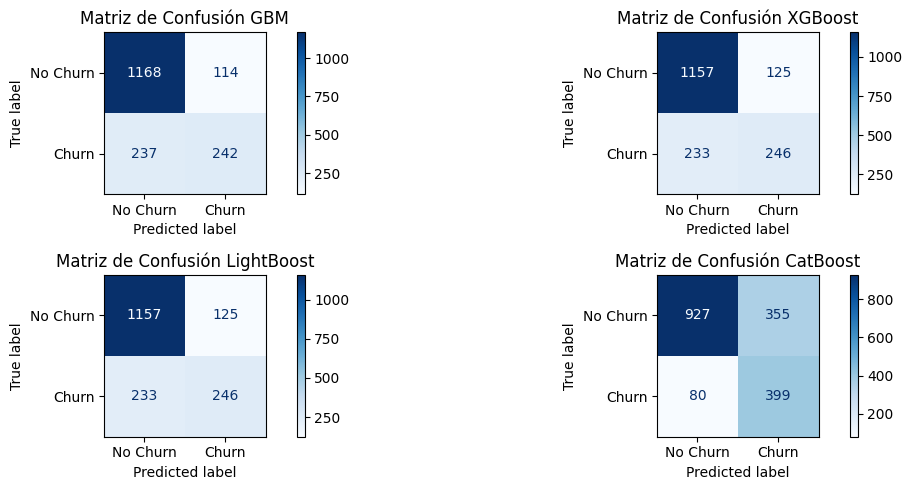

In [396]:
#Matriz de confusión
fig, axs = plt.subplots(2, 2, figsize=(12, 5))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_gbr, display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues", ax=axs[0][0])
axs[0][0].set_title('Matriz de Confusión GBM')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues", ax=axs[0][1])
axs[0][1].set_title('Matriz de Confusión XGBoost')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues", ax=axs[1][0])
axs[1][0].set_title('Matriz de Confusión LightBoost')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_cb, display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues", ax=axs[1][1])
axs[1][1].set_title('Matriz de Confusión CatBoost')

plt.tight_layout()
plt.show()

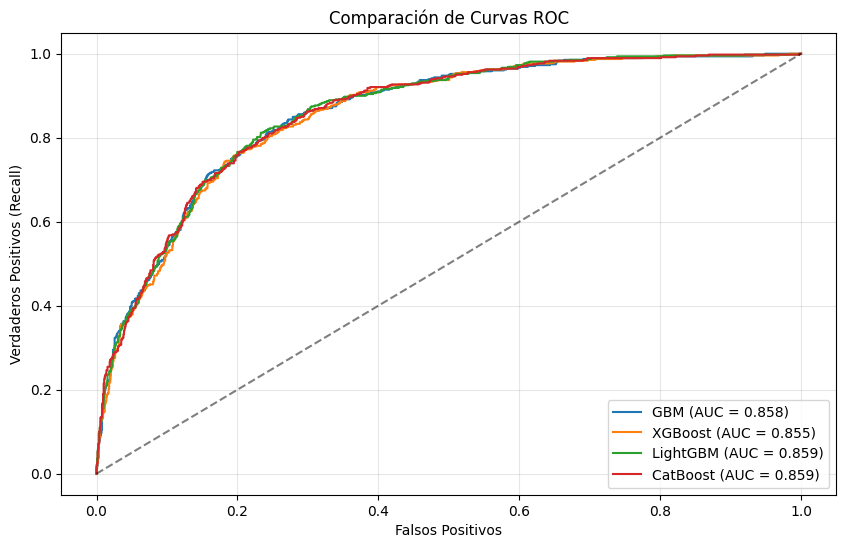

In [397]:
# Lista de tus modelos entrenados
modelos = [gbr, xgb, lgb, cb]
nombres = ['GBM', 'XGBoost', 'LightGBM', 'CatBoost']

plt.figure(figsize=(10, 6))

for mod, nom in zip(modelos, nombres):
    probs = mod.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{nom} (AUC = {auc:.3f})') # Usamos 3 decimales para ver diferencias

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos (Recall)')
plt.title('Comparación de Curvas ROC')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

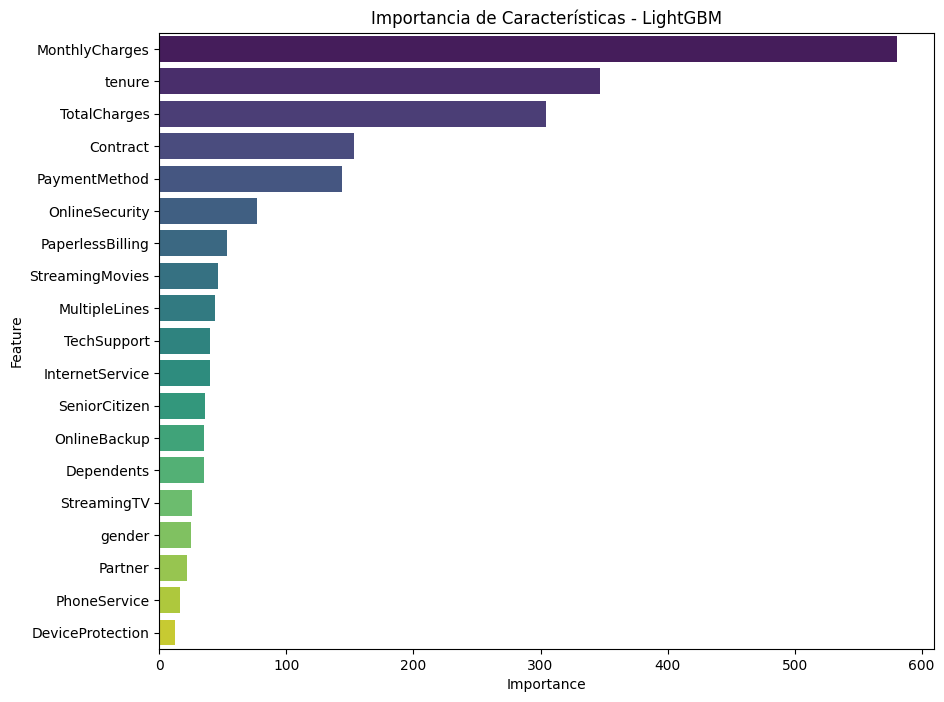

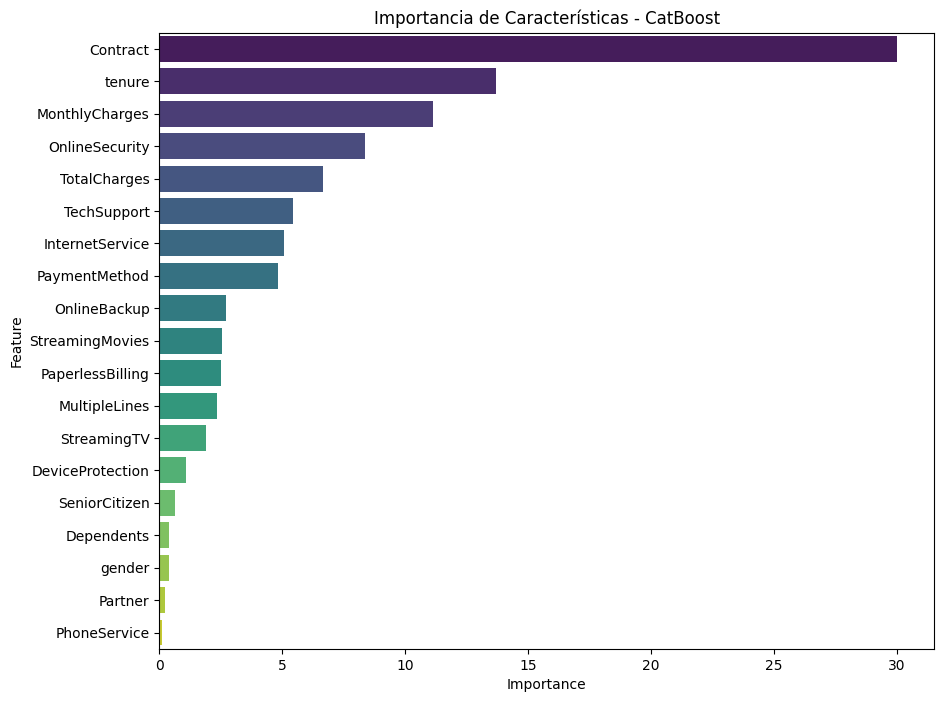

In [411]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Función para graficar importancia de características
def plot_feature_importance(model, X, model_name):
    # Obtener importancia
    feature_importance = model.feature_importances_
    feature_names = X.columns

    # Crear DataFrame y ordenar
    df_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    df_importance = df_importance.sort_values(by='Importance', ascending=False)

    # Graficar
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=df_importance, palette='viridis',hue='Feature',legend=False )
    plt.title(f'Importancia de Características - {model_name}')
    plt.show()

# Ejecutar para tus modelos
plot_feature_importance(lgb, x_train, 'LightGBM')
plot_feature_importance(cb, x_train, 'CatBoost')

In [412]:
modelos_dict = {'GBM': gbr, 'XGBoost': xgb, 'LightGBM': lgb, 'CatBoost': cb}

for nombre, mod in modelos_dict.items():
    preds = mod.predict(x_test)
    print(f"--- Reporte para {nombre} ---")
    print(classification_report(y_test, preds, target_names=['No Churn', 'Churn']))
    print("\n")

--- Reporte para GBM ---
              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1282
       Churn       0.68      0.51      0.58       479

    accuracy                           0.80      1761
   macro avg       0.76      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



--- Reporte para XGBoost ---
              precision    recall  f1-score   support

    No Churn       0.83      0.90      0.87      1282
       Churn       0.66      0.51      0.58       479

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



--- Reporte para LightGBM ---
              precision    recall  f1-score   support

    No Churn       0.92      0.73      0.81      1282
       Churn       0.54      0.83      0.65       479

    accuracy                           0.76      1761
   macro avg       0.73      0.78      0

In [413]:
# Guardar el modelo CatBoost (el ganador por Recall)
import pickle

filename = 'modelo_catboost_churn.pkl'
with open(filename, 'wb') as file:
    pickle.dump(cb, file)

print(f"Modelo guardado exitosamente como {filename}")

Modelo guardado exitosamente como modelo_catboost_churn.pkl


In [414]:
#Reporte de clientes en riesgo
import pandas as pd

# 1. Obtener las probabilidades de Churn usando el mejor modelo (CatBoost)
# Usamos [:, 1] para obtener la probabilidad de la clase positiva (Churn)
probabilidades = cb.predict_proba(x_test)[:, 1]

# 2. Crear un DataFrame con los resultados
# Asumimos que x_test tiene un índice que identifica al cliente (ej. CustomerID)
df_resultados = pd.DataFrame({
    'Probabilidad_Churn': probabilidades
}, index=x_test.index)

# 3. Ordenar por riesgo de mayor a menor y seleccionar los top 100
top_riesgo = df_resultados.sort_values(by='Probabilidad_Churn', ascending=False).head(100)

# 4. Guardar en un archivo CSV
top_riesgo.to_csv('clientes_riesgo_prioritario.csv')

print("¡Archivo 'clientes_riesgo_prioritario.csv' generado!")
print("Top 5 clientes con mayor riesgo:")
print(top_riesgo.head())

¡Archivo 'clientes_riesgo_prioritario.csv' generado!
Top 5 clientes con mayor riesgo:
      Probabilidad_Churn
2208            0.957423
4800            0.947566
2577            0.946955
534             0.940479
969             0.939438
